In [1]:
import pandas as pd
import random
import numpy as np

import seaborn as sns

from tqdm import tqdm

In [2]:
pd.set_option('display.max_columns', None)

## Upload data
### tickets data

In [3]:
df_tickets = pd.read_csv('data.nosync/cfdb.csv')
df_tickets = df_tickets.iloc[:,1:]

In [4]:
# Total tickets: 6.8M

df_tickets.shape

(6848976, 7)

In [5]:
df_tickets.head(50)

,_id,mall,date,customer,desc,net_am,n_unit
0,1001,2,2016-01-14T20:07:00.000+0000,77021708271,caramelos s/azucar,1.00,1
1,1002,1,2016-01-14T15:25:00.000+0000,77021708271,tosta variada,3.00,1
2,1002,1,2016-01-14T15:25:00.000+0000,77021708271,baguette tortilla,1.00,1
3,1003,2,2016-01-14T20:07:00.000+0000,77021708271,queso tierno mezcl,2.83,1
4,1003,2,2016-01-14T20:07:00.000+0000,77021708271,guisantes muy fino,1.65,1
5,1003,2,2016-01-14T20:07:00.000+0000,77021708271,bifidus con frutas,1.77,1
6,1003,2,2016-01-14T20:07:00.000+0000,77021708271,maiz dulce pack3x140,1.16,1
7,1003,2,2016-01-14T20:07:00.000+0000,77021708271,sanus fresa l. casei,2.50,1
8,1003,2,2016-01-14T20:07:00.000+0000,77021708271,fanta limon s/burb,1.00,1
9,1003,2,2016-01-14T20:07:00.000+0000,77021708271,cereales estrellitas,1.85,1


In [6]:
# Total unique customers: 66K

len(df_tickets['customer'].unique())

66058

In [7]:
# Total unique products: 51K

len(df_tickets['desc'].unique())

53403

### IMPORTANT: 
1M rows have no customer associated with it 


Other missing values that are not actually missing?

In [8]:
df_tickets.isnull().apply(lambda x: sum(x), axis=0)

_id         0
mall        0
date        0
customer    0
desc        0
net_am      0
n_unit      0
dtype: int64

In [9]:
# There are no missing values, but some customers have value 'Unknown'

df_tickets[df_tickets['customer']=='Unknown'].shape

(1047818, 7)

In [10]:
# Clean dataset from 'Unknown' customer ID

df_tickets = df_tickets[df_tickets['customer'] !='Unknown']

In [11]:
df_tickets.shape

(5801158, 7)

### Low/High prices data

This dataset constains the result of the scraping process on carrefour.es website.


Furthermore, the prices have been manipulated in order to compute, for each category defined by the path, a distribution of the prices. 
Therefore, the products whose prices falls in the top 80% for each category as labelled as high, while the products that fall in the bottom 20% are labelled as low.

In [12]:
df_premium = pd.read_csv('data.nosync/premium_price_products_percentiles.csv')
df_premium = df_premium.iloc[:,1:]

In [13]:
# We scraped almost 31K products out of 51K total.
# The products that are scraped are in the categories that we deemed as most interesting.

df_premium.shape

(30979, 6)

In [14]:
df_premium.dtypes

ProductName                    object
FullPath                       object
BuyboxPricedf_cost_product    float64
premium                        object
low                             int64
high                            int64
dtype: object

In [15]:
# The column premium has missing values for all the products whose price is neither high nor low.

df_premium.isnull().apply(lambda x: sum(x), axis=0)

ProductName                       0
FullPath                          0
BuyboxPricedf_cost_product        0
premium                       17043
low                               0
high                              0
dtype: int64

In [16]:
df_premium.head()

,ProductName,FullPath,BuyboxPricedf_cost_product,premium,low,high
0,torreznos de cerdo carrefour 250 g,Inicio/Supermercado/El Mercado/Carnicería/Otra...,2.30,Low,1,0
1,magro de cerdo marinado adobado carrefour 500 g,Inicio/Supermercado/El Mercado/Carnicería/Otra...,3.50,NaN,0,0
2,filete de lomo de cerdo adobado extra 400 g aprox,Inicio/Supermercado/El Mercado/Carnicería/Otra...,3.90,NaN,0,0
3,chuletas mixtas de cordero 1 kg aprox,Inicio/Supermercado/El Mercado/Carnicería/Cordero,10.50,NaN,0,0
4,chuleta de sajonia 500 g aprox,Inicio/Supermercado/El Mercado/Carnicería/Otra...,4.62,High,0,1


In [17]:
df_premium['ProductName'] = df_premium['ProductName'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_premium['ProductName'] = df_premium['ProductName'].str.lower()

### Name pairing data

This dataset contain the pairing between the name of the products reported in the tickets and the name on the products scraped.

In fact, the name of the products that are in the original Carrefour dataset are shorter and more synthetic that the name of the products as present on the website. Our goal is to use an algorithm to match the two names.

To be complitely clear, the goal for our purposes is not to link perfectly the names in the description with the names scraped. What we want to be able to do is to make a linking good enough so that, even if the products is not linkedin to its exact correspondent from the scraping, it falls in the same category, as defined by the path.

Using an example, if in the Carrefour dataset we have a product named 'chicken hamburger 200g', we will try to link it to the same exact product in the scraping file, even though maybe it has a slightly longer/different name, but our goal is really to classify the product as meat, possibly as chicken in particular as well.

How was this matching tested? We used a random number generator to sample 100 matching and computed an accuracy score above 75% which we find good.

In [18]:
df_pairing = pd.read_csv('data.nosync/name_pairing_exact.csv')
df_pairing = df_pairing.iloc[:,1:]

In [19]:
df_pairing['name_scraped'] = df_pairing['name_scraped'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_pairing['name_scraped'] = df_pairing['name_scraped'].str.lower()

In [20]:
df_pairing.shape

(53403, 5)

In [21]:
df_pairing.dtypes

Unique_desc          object
scraped               int64
name_scraped         object
path_scraped         object
match_percentage    float64
dtype: object

In [22]:
df_pairing.isnull().apply(lambda x: sum(x), axis=0)

Unique_desc             0
scraped                 0
name_scraped        15677
path_scraped        15677
match_percentage        0
dtype: int64

In [23]:
df_pairing[df_pairing['name_scraped'].isnull()]

,Unique_desc,scraped,name_scraped,path_scraped,match_percentage
26,legging nina 3/14,0,NaN,NaN,0.0
27,jersey unisex 3/14,0,NaN,NaN,0.0
55,ristorante formaggi,0,NaN,NaN,0.0
77,vol au vent 6 und,0,NaN,NaN,0.0
88,cam mc strass wp,0,NaN,NaN,0.0
...,...,...,...,...,...
53397,dra juguetes dvd,0,NaN,NaN,0.0
53398,citypack venecia,0,NaN,NaN,0.0
53399,bandolera isotermica,0,NaN,NaN,0.0
53401,matacarcomas 400ml,0,NaN,NaN,0.0


In [25]:
# The reason why there is a row constaining NaNs is because the product was not scraped.

df_pairing[df_pairing['scraped']==0].head()

,Unique_desc,scraped,name_scraped,path_scraped,match_percentage
26,legging nina 3/14,0,NaN,NaN,0.0
27,jersey unisex 3/14,0,NaN,NaN,0.0
55,ristorante formaggi,0,NaN,NaN,0.0
77,vol au vent 6 und,0,NaN,NaN,0.0
88,cam mc strass wp,0,NaN,NaN,0.0


In [26]:
df_pairing.head()

,Unique_desc,scraped,name_scraped,path_scraped,match_percentage
0,caramelos s/azucar,1,caramelos sabor fresa tic tac 18 g.,Inicio/Supermercado/La Despensa/Dulce y Desayu...,0.500000
1,tosta variada,1,galletas con chocolate blanco y leche tosta ri...,Inicio/Supermercado/La Despensa/Dulce y Desayu...,0.500000
2,baguette tortilla,1,baguette miniviena 4 ud. la boulangere 220 g.,"Inicio/Supermercado/El Mercado/Panadería, Boll...",0.500000
3,queso tierno mezcl,1,queso tierno mini el ventero 550 g,Inicio/Supermercado/El Mercado/Quesos/Todos lo...,0.333333
4,guisantes muy fino,1,guisantes muy tiernos carrefour 300 g.,Inicio/Supermercado/El Mercado/Verduras y hort...,0.333333


### Merge

In [27]:
df_premium['ProductName'].duplicated().any()

True

In [28]:
df_pairing['name_scraped'].duplicated().any()

True

In [29]:
df_premium.drop_duplicates(subset=['ProductName'], inplace=True)
df_premium.shape

(22128, 6)

In [30]:
df_pairing.drop_duplicates(subset=['name_scraped'], inplace=True)
df_pairing.shape

(15008, 5)

In [31]:
# First Merge

pairing_cols = ['name_scraped', 'Unique_desc']
df_premium_paired = df_premium.merge(df_pairing[pairing_cols], how='left', left_on='ProductName', right_on='name_scraped')

In [32]:
df_premium_paired.head()

,ProductName,FullPath,BuyboxPricedf_cost_product,premium,low,high,name_scraped,Unique_desc
0,torreznos de cerdo carrefour 250 g,Inicio/Supermercado/El Mercado/Carnicería/Otra...,2.30,Low,1,0,torreznos de cerdo carrefour 250 g,torreznos 250 grs
1,magro de cerdo marinado adobado carrefour 500 g,Inicio/Supermercado/El Mercado/Carnicería/Otra...,3.50,NaN,0,0,magro de cerdo marinado adobado carrefour 500 g,fiambre de magro
2,filete de lomo de cerdo adobado extra 400 g aprox,Inicio/Supermercado/El Mercado/Carnicería/Otra...,3.90,NaN,0,0,filete de lomo de cerdo adobado extra 400 g aprox,lomo adobado iberi
3,chuletas mixtas de cordero 1 kg aprox,Inicio/Supermercado/El Mercado/Carnicería/Cordero,10.50,NaN,0,0,chuletas mixtas de cordero 1 kg aprox,chuletas mixtas lomo
4,chuleta de sajonia 500 g aprox,Inicio/Supermercado/El Mercado/Carnicería/Otra...,4.62,High,0,1,chuleta de sajonia 500 g aprox,chuleta lomo extrati


In [33]:
df_premium_paired.shape

(22128, 8)

In [35]:
# These values are missing because not all products scraped have been linked to tickets.

df_premium_paired.isnull().apply(lambda x: sum(x), axis=0)

ProductName                       0
FullPath                          0
BuyboxPricedf_cost_product        0
premium                       11948
low                               0
high                              0
name_scraped                   7121
Unique_desc                    7121
dtype: int64

In [37]:
df_premium_paired[df_premium_paired['name_scraped'].isnull()]

,ProductName,FullPath,BuyboxPricedf_cost_product,premium,low,high,name_scraped,Unique_desc
11,solomillo de cerdo adobado extratiernos elpozo...,Inicio/Supermercado/El Mercado/Carnicería/Cerdo,4.80,NaN,0,0,NaN,NaN
12,callos de cerdo icarben 500 g,Inicio/Supermercado/El Mercado/Carnicería/Otra...,4.90,High,0,1,NaN,NaN
16,costillar de cordero 400 g aprox,Inicio/Supermercado/El Mercado/Carnicería/Cordero,6.64,NaN,0,0,NaN,NaN
25,chuletas de cordero para barbacoa moralejo 400...,Inicio/Supermercado/El Mercado/Carnicería/Cordero,7.16,NaN,0,0,NaN,NaN
26,cordero 10-13 garron,Inicio/Supermercado/El Mercado/Carnicería/Cordero,2.41,Low,1,0,NaN,NaN
...,...,...,...,...,...,...,...,...
22117,calorilight turboslim 120 ud.,Inicio/Supermercado/Parafarmacia/Nutrición y D...,25.70,NaN,0,0,NaN,NaN
22122,complemento alimenticio para perdida de peso m...,Inicio/Supermercado/Parafarmacia/Nutrición y D...,76.35,High,0,1,NaN,NaN
22123,apositos ampollas stick anti-friccion compeed ...,Inicio/Supermercado/Parafarmacia/Cuidado de ma...,7.30,NaN,0,0,NaN,NaN
22126,langostinos cocidos 330 g,Inicio/Supermercado/El Mercado/Pescadería/Mari...,7.50,NaN,0,0,NaN,NaN


In [38]:
# Second Merge

df = df_tickets.merge(df_premium_paired, how='left', left_on='desc', right_on='Unique_desc')

In [39]:
df.columns

Index(['_id', 'mall', 'date', 'customer', 'desc', 'net_am', 'n_unit',
       'ProductName', 'FullPath', 'BuyboxPricedf_cost_product', 'premium',
       'low', 'high', 'name_scraped', 'Unique_desc'],
      dtype='object')

In [40]:
# Drop useless columns

cols_to_drop = ['name_scraped', 'Unique_desc', 'premium']
df.drop(cols_to_drop, axis=1, inplace=True)
df.head()

,_id,mall,date,customer,desc,net_am,n_unit,ProductName,FullPath,BuyboxPricedf_cost_product,low,high
0,1001,2,2016-01-14T20:07:00.000+0000,77021708271,caramelos s/azucar,1.00,1,caramelos sabor fresa tic tac 18 g.,Inicio/Supermercado/La Despensa/Dulce y Desayu...,1.06,0.0,0.0
1,1002,1,2016-01-14T15:25:00.000+0000,77021708271,tosta variada,3.00,1,galletas con chocolate blanco y leche tosta ri...,Inicio/Supermercado/La Despensa/Dulce y Desayu...,2.20,0.0,0.0
2,1002,1,2016-01-14T15:25:00.000+0000,77021708271,baguette tortilla,1.00,1,baguette miniviena 4 ud. la boulangere 220 g.,"Inicio/Supermercado/El Mercado/Panadería, Boll...",1.79,0.0,0.0
3,1003,2,2016-01-14T20:07:00.000+0000,77021708271,queso tierno mezcl,2.83,1,queso tierno mini el ventero 550 g,Inicio/Supermercado/El Mercado/Quesos/Todos lo...,7.45,0.0,1.0
4,1003,2,2016-01-14T20:07:00.000+0000,77021708271,guisantes muy fino,1.65,1,guisantes muy tiernos carrefour 300 g.,Inicio/Supermercado/El Mercado/Verduras y hort...,0.80,1.0,0.0


In [41]:
df.shape

(5801158, 12)

In [42]:
# These values are missing because not all tickets have been scraped.
# TODO: check it

df.isnull().apply(lambda x: sum(x), axis=0)

_id                                 0
mall                                0
date                                0
customer                            0
desc                                0
net_am                              0
n_unit                              0
ProductName                   1835655
FullPath                      1835655
BuyboxPricedf_cost_product    1835655
low                           1835655
high                          1835655
dtype: int64

In [43]:
df.fillna(value={'FullPath':''}, inplace=True)

# Labelling

### 'sex' of the product

If a product contains the word 'hombre' it will be labelled M, otherwise F if it contains the word 'mujer'.

Another way to assign the sex is using the paths from the scraping that are characteristically male or female

In [44]:
def sex_desc(x):
    
    if 'hombre' in x and 'mujer' in x:
        return 'B'
    elif 'hombre' in x:
        return 'M'
    elif 'mujer' in x:
        return 'F'
    else:
        return 'N'
    
male_product_paths = ['Afeitado', 'After Shave']
female_product_paths = ['Ojos', 'Uñas', 'Rostro', 'Accesorios de Maquillaje', 'Labios','Compresas', 'Tampones', 'Protege Slip', 'Depilación']
    
def sex_path(x):
    x = x.split('/')
    
    for i in x:
        if i in male_product_paths:
            return 'M'
        if i in female_product_paths:
            return 'F'
    return 'N'

In [45]:
df['sex_desc'] = df['desc'].apply(lambda x: sex_desc(x))
df[df['sex_desc']!='N'].shape

(13112, 13)

In [46]:
df['sex_path'] = df['FullPath'].apply(lambda x: sex_path(x))
df[df['sex_path']!='N'].shape

(42059, 14)

In [47]:
# We give priority to sex_desc and sex_path is used to fill when sex_desc does not help

df.loc[df['sex_desc']=='M', 'sex_path'] = 'M'
df.loc[df['sex_desc']=='F', 'sex_path'] = 'F'
df['sex'] = df['sex_path'].copy()
df.drop(['sex_desc', 'sex_path'], axis=1, inplace=True)

In [48]:
df[df['sex']!='N'].shape

(55171, 13)

In [49]:
df[df['sex']=='M'].head()

,_id,mall,date,customer,desc,net_am,n_unit,ProductName,FullPath,BuyboxPricedf_cost_product,low,high,sex
2023,65,2,2016-01-14T18:02:00.000+0000,77053280208,gel afeitar gillet,3.1,1,gel de afeitar para pieles sensibles gillette ...,Inicio/Supermercado/Perfumería e Higiene/Depil...,4.75,0.0,0.0,M
2287,1142,1,2016-01-14T21:38:00.000+0000,77050210046,brocha afeitar,6.1,1,brocha de afeitar wilkinson 1 ud.,Inicio/Supermercado/Perfumería e Higiene/Depil...,6.75,0.0,1.0,M
2313,1146,2,2016-01-14T19:37:00.000+0000,77050210046,gel afeitar gillet,3.1,1,gel de afeitar para pieles sensibles gillette ...,Inicio/Supermercado/Perfumería e Higiene/Depil...,4.75,0.0,0.0,M
2462,89,2,2016-01-14T15:57:00.000+0000,77053280208,malla sky hombre,0.0,1,NaN,,NaN,NaN,NaN,M
2589,1160,2,2016-01-14T18:35:00.000+0000,77031428274,gel afeitar gillet,3.1,1,gel de afeitar para pieles sensibles gillette ...,Inicio/Supermercado/Perfumería e Higiene/Depil...,4.75,0.0,0.0,M


### 'bebe'

If there are problem with the label we can make another one that looks for the word 'bebe' (or similar) in the product like we did for M/F

In [50]:
df['bebe'] = False
df_mask = df.copy()
mask = df_mask['FullPath'].fillna('').str.contains('Bebé')
df.loc[mask, 'bebe'] = True

In [51]:
df[df['bebe']].head()

,_id,mall,date,customer,desc,net_am,n_unit,ProductName,FullPath,BuyboxPricedf_cost_product,low,high,sex,bebe
57,1010,1,2016-01-14T22:06:00.000+0000,77051306567,panal dodot azul t4,8.73,1,panal dodot sensitive recien nacido t2 (4-8 kg...,Inicio/Supermercado/Bebé/Pañales y Toallitas/P...,39.95,0.0,1.0,N,True
65,1010,1,2016-01-14T22:06:00.000+0000,77051306567,toallitas dodot,9.50,1,toallitas para bebe basico dodot 54 ud.,Inicio/Supermercado/Bebé/Pañales y Toallitas/T...,0.98,1.0,0.0,N,True
79,1010,1,2016-01-14T22:06:00.000+0000,77051306567,baby bol 300ml,5.00,2,pants optima adsorption my carrefour baby t6 (...,Inicio/Supermercado/Bebé/Pañales y Toallitas/P...,6.20,0.0,0.0,N,True
91,1011,2,2016-01-14T23:06:00.000+0000,77051306567,pijama pto ml sra,13.00,1,leche infantil de continuacion con cereales pi...,Inicio/Supermercado/Bebé/Alimentación infantil...,2.00,0.0,0.0,N,True
231,1029,2,2016-01-14T22:00:00.000+0000,77055638528,platano canario,2.53,1,"preparado de pera, platano y kiwi desde 6 mese...",Inicio/Supermercado/Bebé/Alimentación infantil...,1.65,0.0,0.0,N,True


### 'animal'

If there are problem with the label we can make another one that looks for the words like dog/cat/etc... in the product like we did for M/F

In [52]:
df['animal'] = False
df_mask = df.copy()
mask = df['FullPath'].fillna('').str.contains('Mascotas')
df.loc[mask, 'animal'] = True

In [53]:
df[df['animal']].head()

,_id,mall,date,customer,desc,net_am,n_unit,ProductName,FullPath,BuyboxPricedf_cost_product,low,high,sex,bebe,animal
9,1003,2,2016-01-14T20:07:00.000+0000,77021708271,cereales estrellitas,1.85,1,"pienso de buey, verduras y cereales para perro...",Inicio/Supermercado/Mascotas/Perros/Pienso par...,3.99,0.0,0.0,N,False,True
161,1015,2,2016-01-14T21:05:00.000+0000,77051306567,brekkies excel 15kg,22.95,1,snack dental para perros total dent excel brek...,"Inicio/Supermercado/Mascotas/Perros/Premios, S...",2.50,0.0,0.0,N,False,True
391,1046,1,2016-01-14T21:54:00.000+0000,77018235873,sheba 4x85gr,2.30,1,sheba multipack de 6 bolsitas delices du jour ...,Inicio/Supermercado/Mascotas/Gatos/Pienso para...,2.50,0.0,0.0,N,False,True
392,1046,1,2016-01-14T21:54:00.000+0000,77018235873,sheba 4x85gr,2.30,2,sheba multipack de 6 bolsitas delices du jour ...,Inicio/Supermercado/Mascotas/Gatos/Pienso para...,2.50,0.0,0.0,N,False,True
395,1046,1,2016-01-14T21:54:00.000+0000,77018235873,gato humedo 12x100gr,3.95,1,alimento humedo para gato con buey y zanahoria...,Inicio/Supermercado/Mascotas/Gatos/Pienso para...,0.35,1.0,0.0,N,False,True


# Group by customer ID

Now we group all the individual tickets in one single shopping per customer id.

In doing the group by, we aggregate different metrics both at the shopping level (ex. date and time of shopping) and at the product level (ex. M/F)

In [54]:
# Initially we though that the _id column indicated the different shopping
# After the EDA, we discovered that there are many cases of different _id shopping that happened at the same time
# In general, we observed that for every shopping time, there are multiple shopping _id, therefore we decided to grouyp by the different timestamps.

# TODO: what is the role of _id? Each _id associated with only one timestamp?

df_id = df.groupby(by=['customer']).nunique()['date']

In [55]:
# The shape is the same as the unique number of customers, less the Unknown customer that was removed at the beginning of the notebook.

df_id.shape

(66057,)

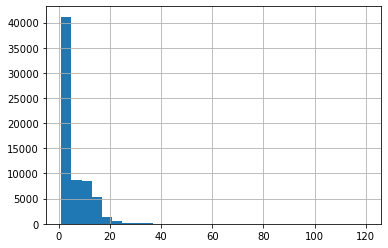

In [56]:
df_id.hist(bins=30)

In [57]:
# What to do about the big peak?
# What is the most common value of the count?
# Should we take out from our analysis all the one-time purchases?

df_id.value_counts().sort_index().head(50)

1     35426
2      1852
3      1887
4      1998
5      2108
6      2114
7      2145
8      2247
9      2197
10     2099
11     2206
12     2024
13     1815
14     1529
15     1131
16      815
17      539
18      378
19      256
20      190
21      139
22      129
23      106
24       91
25       67
26       61
27       70
28       53
29       42
30       40
31       42
32       39
33       29
34       16
35       15
36       15
37       16
38       15
39       10
40       14
41        5
42        7
43        4
44        3
45        6
46        4
47        3
48        6
49        5
50        4
Name: date, dtype: int64

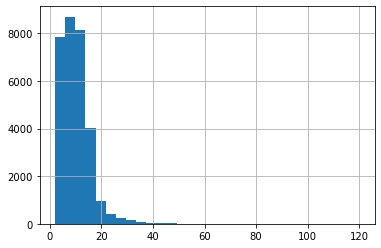

In [58]:
# Would it make sense to delete all the consumers that go just for one shopping?
# On the other hand, if they are easy to cluster, they will end up in their own cluster anyway?
# But including them maybe will lead to worst clustering for the observations we are really interested in?

df_id[df_id != 1].hist(bins=30)

In [59]:
# Number of unique customers after removing one-time purchasers: 30K
# This means that more than half of all the purchases are one-time.

df_id[df_id != 1].shape

(30631,)

In [60]:
# To check if it would be better to remove the one-time-purchesers, I create a new df without them.
# In this way, I can check how this other dataset perform in all the analysis below.

def remove_one_time_purchasers(df_id):
    df_id_multiple = df_id.copy()
    return df_id_multiple[df_id_multiple['count'] != 1]

def remove_k_time_purchasers(df_id, k):
    df_id_multiple = df_id.copy()
    return df_id_multiple[df_id_multiple['count'] > k]

## Statistics on datetime

In [61]:
df['datetime'] = pd.to_datetime(df['date'])

In [62]:
df['hour'] = df['datetime'].dt.hour

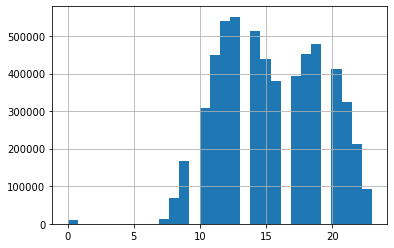

In [63]:
# Weird hour distribution

df['hour'].hist(bins=30)

In [64]:
hour_mean = df.groupby(by=["customer"]).mean()['hour']

In [65]:
hour_variance = df.groupby(by=["customer"]).var()['hour']

In [66]:
df_id = pd.DataFrame([df_id, hour_mean, hour_variance]).T
df_id.columns = ['count', 'hour_mean', 'hour_var']

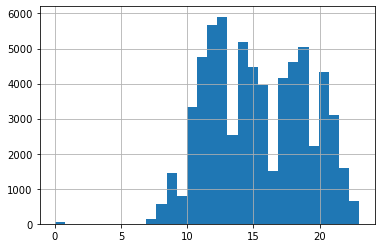

In [67]:
df_id['hour_mean'].hist(bins=30)

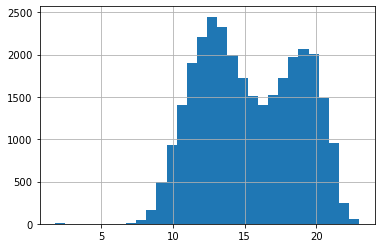

In [68]:
# Nothing much change removing one-time purchasers

df_id_multiple = remove_one_time_purchasers(df_id)
df_id_multiple['hour_mean'].hist(bins=30)

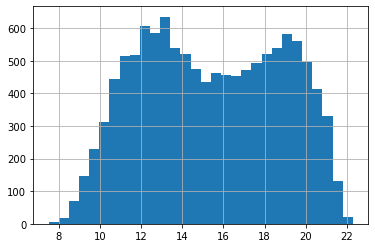

In [69]:
# Same result removing k-and-less-time-purchasers

df_id_multiple_k = remove_k_time_purchasers(df_id, 10)
df_id_multiple_k['hour_mean'].hist(bins=30)

In [70]:
df_id.head()

,count,hour_mean,hour_var
customer,,,
77000001548,12.0,21.086667,2.240761
77000001680,15.0,16.844156,2.281822
77000002166,16.0,19.004329,2.752155
77000004744,7.0,11.636364,1.707013
77000005496,1.0,23.000000,0.000000


## Total items bought

In [71]:
df_id['unit_tot'] = df.groupby(by=['customer']).sum()['n_unit']

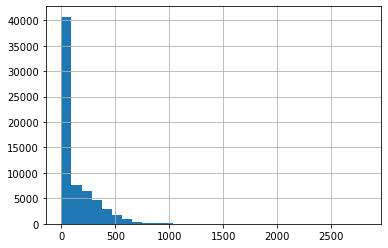

In [72]:
df_id['unit_tot'].hist(bins=30)

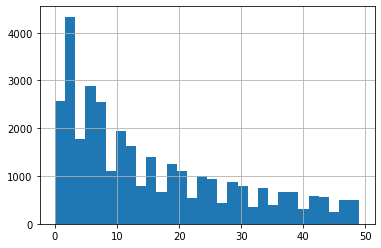

In [73]:
# Let's zoom in

df_id[df_id['unit_tot']<50]['unit_tot'].hist(bins=30)

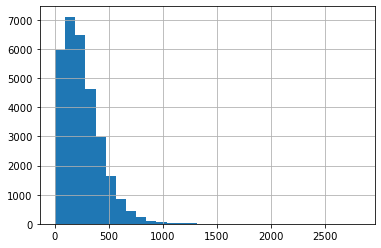

In [74]:
# Let's check without the one-time-shoppers

df_id[df_id['count'] != 1]['unit_tot'].hist(bins=30)

In [75]:
df_id.head()

,count,hour_mean,hour_var,unit_tot
customer,,,,
77000001548,12.0,21.086667,2.240761,222
77000001680,15.0,16.844156,2.281822,403
77000002166,16.0,19.004329,2.752155,324
77000004744,7.0,11.636364,1.707013,259
77000005496,1.0,23.000000,0.000000,5


## Animal/Bebe in shopping

Find the number of shoppings in which a customer purchased at least one item related to animal or bebe.

In [76]:
df['animal'] = df['animal'].astype(bool)
df['bebe'] = df['bebe'].astype(bool)

In [77]:
df_id['animal_tot'] = df.groupby(by=['customer']).sum()['animal']
df_id['bebe_tot'] = df.groupby(by=['customer']).sum()['bebe']

In [78]:
# Total animal products bought by customer

df_id['animal_tot'].value_counts()

0.0     45962
1.0      9954
2.0      4799
3.0      2445
4.0      1353
5.0       718
6.0       372
7.0       197
8.0       114
9.0        70
10.0       30
11.0       20
13.0        9
12.0        6
14.0        5
19.0        1
16.0        1
27.0        1
Name: animal_tot, dtype: int64

In [79]:
# Total bebe products bought by customer

df_id['bebe_tot'].value_counts()

0.0     34840
1.0     10900
2.0      6089
3.0      4398
4.0      3111
5.0      2251
6.0      1513
7.0       998
8.0       700
9.0       465
10.0      274
11.0      187
12.0      102
13.0       77
14.0       46
15.0       32
16.0       22
17.0       14
18.0        9
20.0        6
19.0        6
22.0        5
24.0        3
21.0        2
23.0        2
25.0        2
35.0        1
29.0        1
31.0        1
Name: bebe_tot, dtype: int64

In [80]:
# Percentage animal/bebe products over total products

df_id['animal_perc'] = df_id['animal_tot']*100/df_id['unit_tot']
df_id['bebe_perc'] = df_id['bebe_tot']*100/df_id['unit_tot']

In [81]:
df_id.describe()

,count,hour_mean,hour_var,unit_tot,animal_tot,bebe_tot,animal_perc,bebe_perc
count,66057.000000,66057.000000,62763.000000,66057.000000,66057.000000,66057.000000,65933.000000,65933.000000
mean,4.992007,15.341567,1.446204,129.156335,0.634043,1.443708,0.557961,1.224783
std,5.930931,3.682471,5.154081,172.350741,1.292436,2.303534,2.874812,3.970132
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.197044,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,15.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,18.562500,1.696312,203.000000,1.000000,2.000000,0.373134,1.330377
max,120.000000,23.000000,130.354591,2818.000000,27.000000,35.000000,100.000000,100.000000


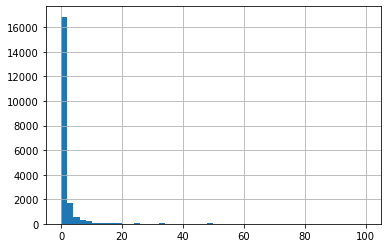

In [82]:
# Distribution of animal products bought in percentage term with total products, for those who bought at least one animal products

df_id[df_id['animal_perc']>0]['animal_perc'].hist(bins=50)

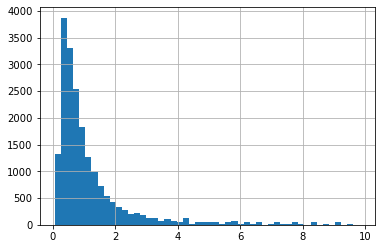

In [83]:
# Let's zoom in

df_id[(df_id['animal_perc']>0) & (df_id['animal_perc']<10)]['animal_perc'].hist(bins=50)

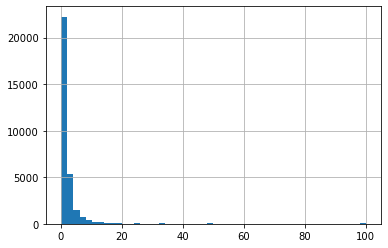

In [84]:
# Distribution of bebe products bought in percentage term with total products, for those who bought at least one bebe products

df_id[df_id['bebe_perc']>0]['bebe_perc'].hist(bins=50)

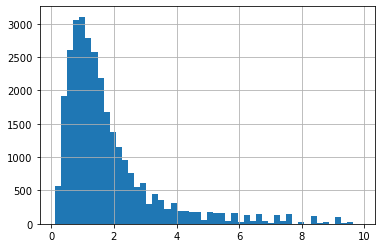

In [85]:
# Let's zoom in

df_id[(df_id['bebe_perc']>0) & (df_id['bebe_perc']<10)]['bebe_perc'].hist(bins=50)

In [86]:
def is_present(x, thresh=0):
    if x>thresh:
        return 1
    return 0

In [87]:
df_id['animal'] = df_id['animal_tot'].apply(lambda x: is_present(x))
df_id['bebe'] = df_id['bebe_tot'].apply(lambda x: is_present(x))

In [88]:
df_id.head()

,count,hour_mean,hour_var,unit_tot,animal_tot,bebe_tot,animal_perc,bebe_perc,animal,bebe
customer,,,,,,,,,,
77000001548,12.0,21.086667,2.240761,222,2.0,0.0,0.900901,0.000000,1,0
77000001680,15.0,16.844156,2.281822,403,1.0,4.0,0.248139,0.992556,1,1
77000002166,16.0,19.004329,2.752155,324,3.0,2.0,0.925926,0.617284,1,1
77000004744,7.0,11.636364,1.707013,259,1.0,2.0,0.386100,0.772201,1,1
77000005496,1.0,23.000000,0.000000,5,0.0,0.0,0.000000,0.000000,0,0


### Premium and cheap products




1. Consider all the products

In [89]:
df_id['high_tot'] = df.groupby(by=['customer']).sum()['high']
df_id['low_tot'] = df.groupby(by=['customer']).sum()['low']

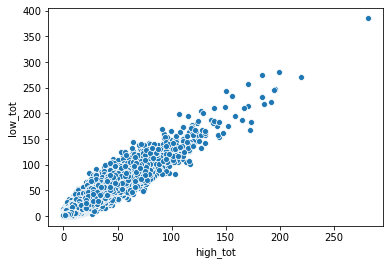

In [90]:
# As we can see from the graph, our measure of high/low used this was is not able to separate high vs low income people
# The reason is that both labels increase at the same relative pace

sns.scatterplot(data=df_id, x='high_tot', y='low_tot')

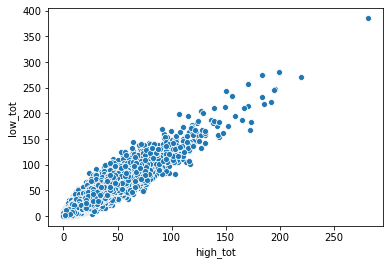

In [91]:
# What about removing one-time purchasers?

df_id_multiple = remove_one_time_purchasers(df_id)
sns.scatterplot(data=df_id_multiple, x='high_tot', y='low_tot')

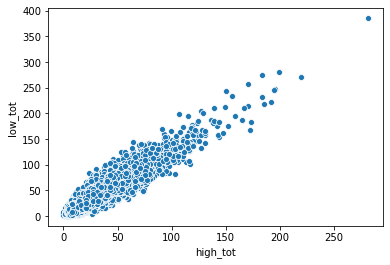

In [92]:
# What about removing k=5 purchasers?

df_id_multiple_k = remove_k_time_purchasers(df_id, k=5)
sns.scatterplot(data=df_id_multiple_k, x='high_tot', y='low_tot')

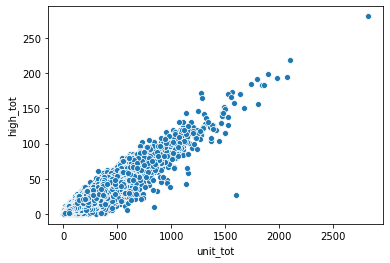

In [93]:
# In particular, both features are linear functions of the total number of products bought

sns.scatterplot(data=df_id, x='unit_tot', y='high_tot')

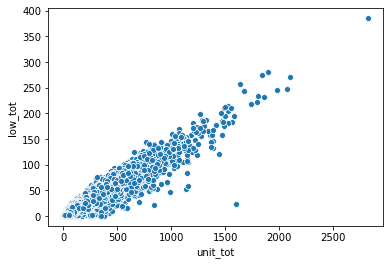

In [94]:
sns.scatterplot(data=df_id, x='unit_tot', y='low_tot')

2. Consider only some sub-categories

The problem with considering all the products is that, because many of them are not standardised, e.x. meat comes in different size packages and we cannot just compare the price to understand which one is more expensive. We should standardize it first.

Because we cannot standardize, we can use products that by nature tend to be so. This was of course checked for the specific case of Carrefour. In particular we are considering 3 categories of products:
1. Milk
2. Pasta
3. Oil

Furthermore, because we want to use the premium measure as an indicator of the income of a customer, we also tested with a survey that the relationship holds for the products above

In [95]:
df.shape

(5801158, 17)

In [96]:
def test_path_list(df, df_id, path_list, min_shop=0, thresh=0.50, min_count=1, return_df=False, verbose=True):
    df['high_spec'] = 0
    df['low_spec'] = 0
    
    df.low_spec = df.low.where(sum([df.FullPath.str.contains(path) for path in path_list]) > 0, df.low_spec)
    df.high_spec = df.high.where(sum([df.FullPath.str.contains(path) for path in path_list]) > 0, df.high_spec)
    
    df_id['high_spec'] = df.groupby(by=['customer']).sum()['high_spec']
    df_id['low_spec'] = df.groupby(by=['customer']).sum()['low_spec']
    
    df_id = remove_k_time_purchasers(df_id, min_shop)
    
    n_customers = df_id[df_id['high_spec'] + df_id['low_spec']>0].shape[0]
    ratio_customers = n_customers*100/df_id.shape[0]
    
    if verbose:
        print('Considering only customers with more that {} shoppings'.format(min_shop))
        print('Number of customers that bought products is the list: {}'.format(n_customers))
        print('Ratio of customers that bought products is the list: {:.2f}%\n'.format(ratio_customers))
    
    df_id['premium'] = 0
    df_id.loc[(df_id.high_spec/(df_id.high_spec+df_id.low_spec)>thresh) & (df_id.high_spec+df_id.low_spec>min_count), 'premium'] = 1
    
    df_id['cheap'] = 0
    df_id.loc[(df_id.low_spec/(df_id.high_spec+df_id.low_spec)>thresh) & (df_id.high_spec+df_id.low_spec>min_count), 'cheap'] = 1
    
    n_non_neutral = df_id[df_id['premium']+df_id['cheap']>0].shape[0]
    ratio_non_neutral = n_non_neutral*100/df_id.shape[0]
    
    if verbose:
        print('Threshold: {}%'.format(thresh*100))
        print('Number of customers that are either premium or cheap: {}'.format(n_non_neutral))
        print('Ratio of customers that are either premium or cheap: {:.2f}%'.format(ratio_non_neutral))
    
    if return_df:
        return df_id

In [97]:
milk = list(set(df[df.FullPath.str.contains('Leche')]['FullPath']))
milk

['Inicio/Supermercado/La Despensa/Lácteos/Leche Condensada, Evaporada y en Polvo',
 'Inicio/Supermercado/La Despensa/Lácteos/Leche',
 'Inicio/Supermercado/Parafarmacia/Bebé/Leche infantil',
 'Inicio/Supermercado/Bebé/Alimentación infantil/Leches Infantiles']

In [98]:
pasta = list(set(df[df.FullPath.str.contains('Pastas')]['FullPath']))
pasta

['Inicio/Supermercado/La Despensa/Alimentación/Pastas']

In [99]:
oil = list(set(df[df.FullPath.str.contains('Aceites y vinagres')]['FullPath']))
oil

['Inicio/Supermercado/La Despensa/Alimentación/Aceites y vinagres']

In [100]:
base_path_list = [milk[1]] + pasta + oil
base_path_list

['Inicio/Supermercado/La Despensa/Lácteos/Leche',
 'Inicio/Supermercado/La Despensa/Alimentación/Pastas',
 'Inicio/Supermercado/La Despensa/Alimentación/Aceites y vinagres']

Experiments

In [101]:
test_path_list(df.copy(), df_id.copy(), base_path_list, min_shop=0, thresh=0.80, min_count=1)

Considering only customers with more that 0 shoppings
Number of customers that bought products is the list: 28643
Ratio of customers that bought products is the list: 43.36%

Threshold: 80.0%
Number of customers that are either premium or cheap: 5622
Ratio of customers that are either premium or cheap: 8.51%


In [102]:
test_path_list(df.copy(), df_id.copy(), base_path_list, min_shop=0, thresh=0.65, min_count=3)

Considering only customers with more that 0 shoppings
Number of customers that bought products is the list: 28643
Ratio of customers that bought products is the list: 43.36%

Threshold: 65.0%
Number of customers that are either premium or cheap: 3960
Ratio of customers that are either premium or cheap: 5.99%


In [103]:
test_path_list(df.copy(), df_id.copy(), base_path_list, min_shop=1, thresh=0.65, min_count=3)

Considering only customers with more that 1 shoppings
Number of customers that bought products is the list: 23109
Ratio of customers that bought products is the list: 75.44%

Threshold: 65.0%
Number of customers that are either premium or cheap: 3937
Ratio of customers that are either premium or cheap: 12.85%


In [104]:
# As of now, we are still keeping all the customers, even those with just one shop

df_temp = test_path_list(df.copy(), df_id.copy(), base_path_list, min_shop=0, thresh=0.65, min_count=3, return_df=True, verbose=False)

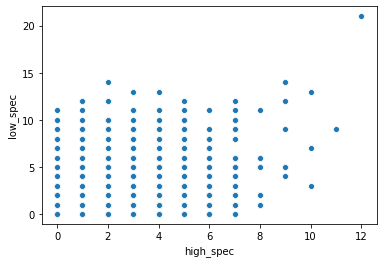

In [105]:
sns.scatterplot(data=df_temp, x='high_spec', y='low_spec')

In [106]:
df_temp[['high_spec', 'low_spec']].corr()

,high_spec,low_spec
high_spec,1.000000,0.469659
low_spec,0.469659,1.000000


In [107]:
df_temp['high_spec_perc'] = df_temp['high_spec']/df_temp['unit_tot']
df_temp['low_spec_perc'] = df_temp['low_spec']/df_temp['unit_tot']

In [108]:
df_temp[['high_spec_perc', 'low_spec_perc']].corr()

,high_spec_perc,low_spec_perc
high_spec_perc,1.000000,-0.006763
low_spec_perc,-0.006763,1.000000


In [109]:
df_temp['high_spec_perc2'] = df_temp['high_spec']/(df_temp['high_spec']+df_temp['low_spec'])
df_temp['low_spec_perc2'] = df_temp['low_spec']/(df_temp['high_spec']+df_temp['low_spec'])

In [110]:
df_temp[['high_spec_perc2', 'low_spec_perc2']].corr()

,high_spec_perc2,low_spec_perc2
high_spec_perc2,1.0,-1.0
low_spec_perc2,-1.0,1.0


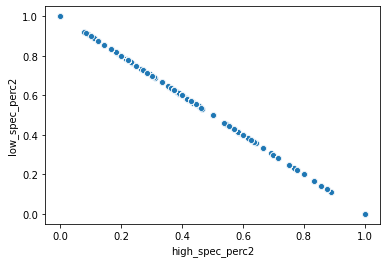

In [111]:
# This is not a surprise because the percentages sum up to 1

sns.scatterplot(data=df_temp, x='high_spec_perc2', y='low_spec_perc2')

In [113]:
df_temp.head()

,count,hour_mean,hour_var,unit_tot,animal_tot,bebe_tot,animal_perc,bebe_perc,animal,bebe,high_tot,low_tot,high_spec,low_spec,premium,cheap,high_spec_perc,low_spec_perc,high_spec_perc2,low_spec_perc2
customer,,,,,,,,,,,,,,,,,,,,
77000001548,12.0,21.086667,2.240761,222,2.0,0.0,0.900901,0.000000,1,0,18.0,30.0,2.0,1.0,0,0,0.009009,0.004505,0.666667,0.333333
77000001680,15.0,16.844156,2.281822,403,1.0,4.0,0.248139,0.992556,1,1,43.0,62.0,1.0,5.0,0,1,0.002481,0.012407,0.166667,0.833333
77000002166,16.0,19.004329,2.752155,324,3.0,2.0,0.925926,0.617284,1,1,31.0,38.0,1.0,3.0,0,1,0.003086,0.009259,0.250000,0.750000
77000004744,7.0,11.636364,1.707013,259,1.0,2.0,0.386100,0.772201,1,1,21.0,26.0,1.0,0.0,0,0,0.003861,0.000000,1.000000,0.000000
77000005496,1.0,23.000000,0.000000,5,0.0,0.0,0.000000,0.000000,0,0,0.0,1.0,0.0,0.0,0,0,0.000000,0.000000,NaN,NaN


3. Only sub-categories with Carrefour prices

In order to be more precise, after different tests, we decided to use Carrefour prices instead of the scraping prices. This way, the linking algorithm does not have top perform as good as a 1 to 1 matching, but it only has to guess the category of the product.

In [114]:
cols = ['customer', 'desc', 'net_am', 'n_unit', 'FullPath']
unique_desc = df[cols].drop_duplicates(subset=['desc']).copy()

In [115]:
unique_desc.head()

,customer,desc,net_am,n_unit,FullPath
0,77021708271,caramelos s/azucar,1.00,1,Inicio/Supermercado/La Despensa/Dulce y Desayu...
1,77021708271,tosta variada,3.00,1,Inicio/Supermercado/La Despensa/Dulce y Desayu...
2,77021708271,baguette tortilla,1.00,1,"Inicio/Supermercado/El Mercado/Panadería, Boll..."
3,77021708271,queso tierno mezcl,2.83,1,Inicio/Supermercado/El Mercado/Quesos/Todos lo...
4,77021708271,guisantes muy fino,1.65,1,Inicio/Supermercado/El Mercado/Verduras y hort...


In [116]:
unique_desc.shape

(51152, 5)

In [117]:
# Compute price from the Carrefour dataset

unique_desc['price'] = unique_desc['net_am']/unique_desc['n_unit']

In [118]:
# Get percetiles levels by category

df_low_price = unique_desc[['FullPath', 'price']].groupby(by=['FullPath']).quantile(0.2)['price']
df_high_price = unique_desc[['FullPath', 'price']].groupby(by=['FullPath']).quantile(0.8)['price']

In [119]:
def compare_price(row, l=base_path_list):

    category = row['FullPath']
    
    if category in l:
        price = float("{:.2f}".format(row['price']))
        low_price = float("{:.2f}".format(df_low_price[df_low_price.index == category].values[0]))
        high_price = float("{:.2f}".format(df_high_price[df_high_price.index == category].values[0]))

        if price <= low_price:
            return 'Low'
        if price >= high_price:
            return 'High'

In [120]:
unique_desc['premium_carr'] = unique_desc.apply(lambda x: compare_price(x), axis=1)

In [121]:
unique_desc['low_carr'] = 0
unique_desc.loc[unique_desc['premium_carr'] == 'Low', 'low_carr'] = 1

unique_desc['high_carr'] = 0
unique_desc.loc[unique_desc['premium_carr'] == 'High', 'high_carr'] = 1

In [122]:
df_copy = df.copy()

In [123]:
cols_drop = ['customer', 'net_am', 'n_unit', 'FullPath']
unique_desc.drop(cols_drop, axis=1, inplace=True)
df_copy = df_copy.merge(unique_desc, how='left', on='desc')

In [124]:
df_copy.head()

,_id,mall,date,customer,desc,net_am,n_unit,ProductName,FullPath,BuyboxPricedf_cost_product,low,high,sex,bebe,animal,datetime,hour,price,premium_carr,low_carr,high_carr
0,1001,2,2016-01-14T20:07:00.000+0000,77021708271,caramelos s/azucar,1.00,1,caramelos sabor fresa tic tac 18 g.,Inicio/Supermercado/La Despensa/Dulce y Desayu...,1.06,0.0,0.0,N,False,False,2016-01-14 20:07:00+00:00,20,1.00,None,0,0
1,1002,1,2016-01-14T15:25:00.000+0000,77021708271,tosta variada,3.00,1,galletas con chocolate blanco y leche tosta ri...,Inicio/Supermercado/La Despensa/Dulce y Desayu...,2.20,0.0,0.0,N,False,False,2016-01-14 15:25:00+00:00,15,3.00,None,0,0
2,1002,1,2016-01-14T15:25:00.000+0000,77021708271,baguette tortilla,1.00,1,baguette miniviena 4 ud. la boulangere 220 g.,"Inicio/Supermercado/El Mercado/Panadería, Boll...",1.79,0.0,0.0,N,False,False,2016-01-14 15:25:00+00:00,15,1.00,None,0,0
3,1003,2,2016-01-14T20:07:00.000+0000,77021708271,queso tierno mezcl,2.83,1,queso tierno mini el ventero 550 g,Inicio/Supermercado/El Mercado/Quesos/Todos lo...,7.45,0.0,1.0,N,False,False,2016-01-14 20:07:00+00:00,20,2.83,None,0,0
4,1003,2,2016-01-14T20:07:00.000+0000,77021708271,guisantes muy fino,1.65,1,guisantes muy tiernos carrefour 300 g.,Inicio/Supermercado/El Mercado/Verduras y hort...,0.80,1.0,0.0,N,False,False,2016-01-14 20:07:00+00:00,20,1.65,None,0,0


In [125]:
df_temp = df_id.copy()

In [126]:
df_temp['high_carr'] = df_copy.groupby(by=['customer']).sum()['high_carr']
df_temp['low_carr'] = df_copy.groupby(by=['customer']).sum()['low_carr']

In [127]:
thresh = 0.65
min_count = 1

In [128]:
df_temp['premium'] = 0
df_temp.loc[(df_temp.high_carr/(df_temp.high_carr+df_temp.low_carr)>thresh) & (df_temp.high_carr+df_temp.low_carr>min_count), 'premium'] = 1
    
df_temp['cheap'] = 0
df_temp.loc[(df_temp.low_carr/(df_temp.high_carr+df_temp.low_carr)>thresh) & (df_temp.high_carr+df_temp.low_carr>min_count), 'cheap'] = 1    

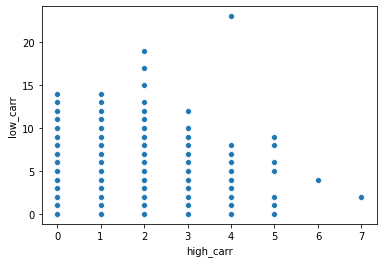

In [129]:
sns.scatterplot(data=df_temp, x='high_carr', y='low_carr')

In [130]:
df_temp[['high_carr', 'low_carr']].corr()

,high_carr,low_carr
high_carr,1.000000,0.290047
low_carr,0.290047,1.000000


In [131]:
df_temp['high_carr_perc'] = df_temp['high_carr']/df_temp['unit_tot']
df_temp['low_carr_perc'] = df_temp['low_carr']/df_temp['unit_tot']

In [132]:
df_temp[['high_carr_perc', 'low_carr_perc']].corr()

,high_carr_perc,low_carr_perc
high_carr_perc,1.000000,-0.000995
low_carr_perc,-0.000995,1.000000


In [133]:
df_temp['high_carr_perc2'] = df_temp['high_carr']/(df_temp['high_carr'] + df_temp['low_carr'])
df_temp['low_carr_perc2'] = df_temp['low_carr']/(df_temp['high_carr'] + df_temp['low_carr'])

In [134]:
df_temp['high_carr_perc2'].fillna(df_temp['high_carr_perc2'].mean(), inplace=True)
df_temp['low_carr_perc2'].fillna(df_temp['low_carr_perc2'].mean(), inplace=True)

In [135]:
df_temp[['high_carr_perc2', 'low_carr_perc2']].corr()

,high_carr_perc2,low_carr_perc2
high_carr_perc2,1.0,-1.0
low_carr_perc2,-1.0,1.0


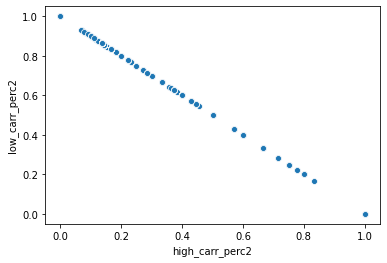

In [136]:
sns.scatterplot(data=df_temp, x='high_carr_perc2', y='low_carr_perc2')

In [137]:
df_temp.head()

,count,hour_mean,hour_var,unit_tot,animal_tot,bebe_tot,animal_perc,bebe_perc,animal,bebe,high_tot,low_tot,high_carr,low_carr,premium,cheap,high_carr_perc,low_carr_perc,high_carr_perc2,low_carr_perc2
customer,,,,,,,,,,,,,,,,,,,,
77000001548,12.0,21.086667,2.240761,222,2.0,0.0,0.900901,0.000000,1,0,18.0,30.0,1,3,0,1,0.004505,0.013514,0.250000,0.750000
77000001680,15.0,16.844156,2.281822,403,1.0,4.0,0.248139,0.992556,1,1,43.0,62.0,0,5,0,1,0.000000,0.012407,0.000000,1.000000
77000002166,16.0,19.004329,2.752155,324,3.0,2.0,0.925926,0.617284,1,1,31.0,38.0,0,3,0,1,0.000000,0.009259,0.000000,1.000000
77000004744,7.0,11.636364,1.707013,259,1.0,2.0,0.386100,0.772201,1,1,21.0,26.0,0,0,0,0,0.000000,0.000000,0.136327,0.863673
77000005496,1.0,23.000000,0.000000,5,0.0,0.0,0.000000,0.000000,0,0,0.0,1.0,0,0,0,0,0.000000,0.000000,0.136327,0.863673


In [138]:
cols_drop = ['high_tot', 'low_tot', 'high_carr', 'low_carr', 'high_carr_perc', 'low_carr_perc']
df_temp.drop(cols_drop, axis=1, inplace=True)

In [139]:
df_id = df_temp.copy()

In [140]:
df_id.head()

,count,hour_mean,hour_var,unit_tot,animal_tot,bebe_tot,animal_perc,bebe_perc,animal,bebe,premium,cheap,high_carr_perc2,low_carr_perc2
customer,,,,,,,,,,,,,,
77000001548,12.0,21.086667,2.240761,222,2.0,0.0,0.900901,0.000000,1,0,0,1,0.250000,0.750000
77000001680,15.0,16.844156,2.281822,403,1.0,4.0,0.248139,0.992556,1,1,0,1,0.000000,1.000000
77000002166,16.0,19.004329,2.752155,324,3.0,2.0,0.925926,0.617284,1,1,0,1,0.000000,1.000000
77000004744,7.0,11.636364,1.707013,259,1.0,2.0,0.386100,0.772201,1,1,0,0,0.136327,0.863673
77000005496,1.0,23.000000,0.000000,5,0.0,0.0,0.000000,0.000000,0,0,0,0,0.136327,0.863673


### average number of prodcuts bought

In [141]:
# Step 1

count_by_shopping = df.groupby(by=['customer','date']).sum()

In [142]:
count_by_shopping.head(20)

_id  mall  net_am  n_unit  \
customer    date                                                           
77000001548 2016-02-27T19:18:00.000+0000   9389387    48  100.69      41   
            2016-02-27T19:19:00.000+0000    908625     3    7.32       3   
            2016-02-27T20:12:00.000+0000    303872     1    1.00       1   
            2016-02-27T20:16:00.000+0000    605786     4    1.18       2   
            2016-02-27T20:17:00.000+0000   5451992    36   54.79      20   
            2016-02-27T20:18:00.000+0000   1817316    12   14.51       7   
            2016-02-27T21:18:00.000+0000   1514435     5   69.53       6   
            2016-02-27T21:19:00.000+0000   2423032     8   29.48       8   
            2016-02-27T22:17:00.000+0000  11812749    39  130.20      82   
            2016-02-27T22:19:00.000+0000   1514365    10   27.87       5   
            2016-02-27T23:17:00.000+0000    605780     4    2.99       2   
            2016-02-27T23:19:00.000+0000   9086303    49  100.54      45   
77000001680 2016-01-22T15:08:00.000+0000   8667523    41   89.57      44   
            2016-01-22T15:10:00.000+0000   6130503    48   84.11      40   
            2016-01-22T16:04:00.000+0000    422834     4    7.98       2   
            2016-01-22T16:05:00.000+0000   1691320     8   24.88       9   
            2016-01-22T16:06:00.000+0000   5496659    52  144.87      32   
            2016-01-22T16:08:00.000+0000  12472936    59  198.72      92   
            2016-01-22T17:05:00.000+0000   4016847    19   55.10      32   
            2016-01-22T17:09:00.000+0000   1057000    10    3.15       6   

                                          BuyboxPricedf_cost_product   low  \
customer    date                                                             
77000001548 2016-02-27T19:18:00.000+0000                       85.05   8.0   
            2016-02-27T19:19:00.000+0000                       11.03   1.0   
            2016-02-27T20:12:00.000+0000                        0.65   1.0   
            2016-02-27T20:16:00.000+0000                        2.15   0.0   
            2016-02-27T20:17:00.000+0000                       30.28   3.0   
            2016-02-27T20:18:00.000+0000                       13.61   2.0   
            2016-02-27T21:18:00.000+0000                       29.01   0.0   
            2016-02-27T21:19:00.000+0000                       24.49   0.0   
            2016-02-27T22:17:00.000+0000                       79.78   7.0   
            2016-02-27T22:19:00.000+0000                       22.23   1.0   
            2016-02-27T23:17:00.000+0000                        3.14   1.0   
            2016-02-27T23:19:00.000+0000                       54.06   6.0   
77000001680 2016-01-22T15:08:00.000+0000                       94.29  11.0   
            2016-01-22T15:10:00.000+0000                       47.90   5.0   
            2016-01-22T16:04:00.000+0000                        5.28   1.0   
            2016-01-22T16:05:00.000+0000                        9.49   0.0   
            2016-01-22T16:06:00.000+0000                      292.39   4.0   
            2016-01-22T16:08:00.000+0000                       75.15  16.0   
            2016-01-22T17:05:00.000+0000                       39.92   4.0   
            2016-01-22T17:09:00.000+0000                        8.17   2.0   

                                          high  bebe  animal  hour  
customer    date                                                    
77000001548 2016-02-27T19:18:00.000+0000   3.0   0.0     0.0   589  
            2016-02-27T19:19:00.000+0000   0.0   0.0     0.0    57  
            2016-02-27T20:12:00.000+0000   0.0   0.0     0.0    20  
            2016-02-27T20:16:00.000+0000   0.0   0.0     0.0    40  
            2016-02-27T20:17:00.000+0000   3.0   0.0     0.0   360  
            2016-02-27T20:18:00.000+0000   1.0   0.0     0.0   120  
            2016-02-27T21:18:00.000+0000   3.0   0.0     2.0   105  
            2016-02-27T21:19:00.000+

In [143]:
# Step 2

df_id['n_unit_shop_mean'] = count_by_shopping.groupby(by=['customer']).mean()['n_unit']

In [144]:
df_id['n_unit_shop_var'] = count_by_shopping.groupby(by=['customer']).var()['n_unit']

In [145]:
df_id.head()

,count,hour_mean,hour_var,unit_tot,animal_tot,bebe_tot,animal_perc,bebe_perc,animal,bebe,premium,cheap,high_carr_perc2,low_carr_perc2,n_unit_shop_mean,n_unit_shop_var
customer,,,,,,,,,,,,,,,,
77000001548,12.0,21.086667,2.240761,222,2.0,0.0,0.900901,0.000000,1,0,0,1,0.250000,0.750000,18.500000,628.636364
77000001680,15.0,16.844156,2.281822,403,1.0,4.0,0.248139,0.992556,1,1,0,1,0.000000,1.000000,26.866667,704.123810
77000002166,16.0,19.004329,2.752155,324,3.0,2.0,0.925926,0.617284,1,1,0,1,0.000000,1.000000,20.250000,911.000000
77000004744,7.0,11.636364,1.707013,259,1.0,2.0,0.386100,0.772201,1,1,0,0,0.136327,0.863673,37.000000,1064.000000
77000005496,1.0,23.000000,0.000000,5,0.0,0.0,0.000000,0.000000,0,0,0,0,0.136327,0.863673,5.000000,NaN


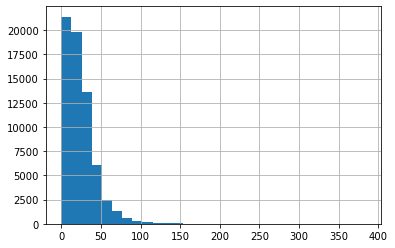

In [146]:
df_id['n_unit_shop_mean'].hist(bins=30)

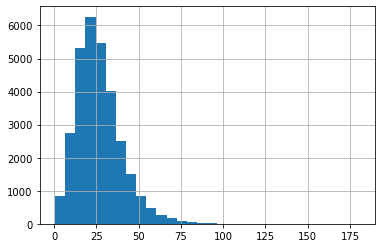

In [147]:
# What about removing one-time purchasers?

df_id_multiple = remove_one_time_purchasers(df_id)
df_id_multiple['n_unit_shop_mean'].hist(bins=30)

### survey data on spending



In [148]:
df_survey = pd.read_csv('data.nosync/survey_data.csv')
df_survey.drop(0, inplace=True)

In [149]:
df_survey.head()

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,Q2.1,Q2.3,Q2.4_1,Q2.5,Q2.6_1,Q2.6_2,Q2.6_3,Q2.6_4,Q2.6_5,Q2.7_1,Q2.7_2,Q2.7_3,Q2.7_4,Q2.7_5,Q2.8_1,Q2.8_2,Q2.8_3,Q2.8_4,Q2.8_5,Q2.9,Q2.10,Q2.11,Q2.12,Q2.13,Q2.14,Q3.1,Q3.2,Q3.3_1,Q3.3_2,Q3.3_3,Q3.3_4,Q3.3_5,Q3.3_6,Q3.3_7,Q3.3_8,Q3.3_9,Q3.3_10,Q3.4_1,Q3.4_2,Q3.4_3,Q3.4_4,Q3.5_1,Q3.5_2,Q3.5_3,Q3.5_4,Q3.5_5,Q4.1,Q4.2,Q4.3,Q4.4,Q4.5,Q4.6,Q4.7,Q4.8_1,Q4.9_1,Q4.10,Q4.11,Q4.12,Q4.13
1,11/7/20 8:02,11/7/20 8:07,0,100,325,1,11/7/20 8:07,R_2z864VwvaVuJxcg,anonymous,IT,1,1,400,2,Off,Off,Off,On,Off,Off,Off,On,Off,Off,Off,Off,Off,Off,On,2,2,1,6,1,3,"1,7,10","1,2",3,0,2,2,NaN,2,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,3,2,2,4,3,4,1,"29,492",NaN,2,3,3,5
2,11/7/20 8:03,11/7/20 8:08,0,100,291,1,11/7/20 8:08,R_2Sc5B14R1xjJSQc,anonymous,IT,1,2,77,2,Off,Off,Off,On,Off,Off,Off,On,Off,Off,Off,Off,On,Off,Off,3,5,1,6,2,NaN,9,"1,2",2,2,3,5,5,5,2,3,5,5,NaN,5,5,NaN,5,NaN,NaN,4,NaN,3,2,2,4,3,4,1,"22,581",NaN,3,3,3,3
3,11/7/20 8:03,11/7/20 8:08,0,100,279,1,11/7/20 8:08,R_1kNsg9h1k7x1ZGs,anonymous,IT,2,1,295,2,Off,Off,Off,On,Off,Off,On,Off,Off,Off,On,Off,Off,Off,Off,2,1,2,NaN,1,3,"1,4,5,7,9",1,NaN,NaN,NaN,5,5,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,3,1,3,4,2,3,2,"53,6",33,1,3,3,3
4,11/7/20 8:02,11/7/20 8:09,0,100,379,1,11/7/20 8:09,R_27WLqDvJV1nWiaX,anonymous,IT,1,1,454,2,Off,Off,On,Off,Off,Off,Off,Off,Off,On,Off,Off,Off,Off,Off,2,3,2,NaN,1,6,"4,5,6,9","1,3",1,1,1,1,0,1,5,1,5,NaN,5,NaN,1,NaN,NaN,NaN,5,NaN,5,3,2,5,4,1,1,1,"20,339",NaN,1,3,2,3
5,11/7/20 8:03,11/7/20 8:09,0,100,390,1,11/7/20 8:09,R_2wc2u9s16WhniJz,anonymous,IT,1,1,706,2,Off,On,Off,Off,Off,Off,Off,On,Off,Off,Off,On,Off,Off,Off,2,1,2,NaN,2,NaN,"4,9","1,3",5,NaN,5,1,NaN,NaN,NaN,NaN,5,NaN,5,5,5,5,5,5,5,5,5,3,2,2,3,2,3,2,"23,022",50,2,3,2,2


In [150]:
df_survey.shape

(451, 69)

In [151]:
# Remove all the entries of people who have not completed the survey

df_survey['Finished'] = df_survey['Finished'].astype(int)
df_survey = df_survey[df_survey['Finished']==1]
df_survey.shape

(308, 69)

In [152]:
df_survey.isnull().apply(lambda x: sum(x), axis=0)

StartDate                  0
EndDate                    0
Status                     0
Progress                   0
Duration (in seconds)      0
                        ... 
Q4.9_1                   228
Q4.10                      0
Q4.11                      0
Q4.12                      0
Q4.13                      0
Length: 69, dtype: int64

We need to create a new column based on survey data to extract:
1. Single
2. Couple
3. Family

Based on these labels, we will study how the montly expenses change.

In [153]:
df_survey['Q4.5'] = df_survey['Q4.5'].astype(int)
df_survey['Q4.6'] = df_survey['Q4.6'].astype(int)

In [154]:
# TODO: change logic to remove students and include students

def assign_label(row):
    if row['Q4.5'] == 1:
        return 'single'
    if row['Q4.5'] == 2 and row['Q4.6'] == 2:
        return 'couple'
    if row['Q4.6'] > 2:
        return 'family'
    return 'else'

df_survey['label'] = df_survey.apply(lambda x: assign_label(x), axis=1)

In [155]:
df_survey['label'].value_counts()

family    202
single     56
couple     30
else       20
Name: label, dtype: int64

Now that we created the labels, we can study if the average spending per month depends on the labels.

Our goal is to train a multinomial logic so that we can infer the label on the original Carrefour dataset.

In [156]:
# Q2.4_1 = Please indicate the amount of money that best approximates your actual expense at the supermarket (each month): - €

df_survey['Q2.4_1'] = df_survey['Q2.4_1'].astype(int)

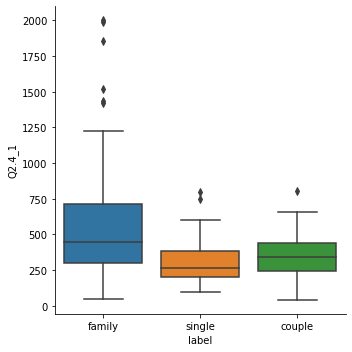

In [157]:
# Visualize montly spending by category

df_survey = df_survey[df_survey['label'] != 'else']
sns.catplot(x="label", y="Q2.4_1", kind="box", dodge=False, data=df_survey)

In [158]:
# TODO: more on specification of the model and classification performance

from sklearn.linear_model import LogisticRegression

In [159]:
X = df_survey['Q2.4_1'].to_numpy().reshape(-1, 1)
y = df_survey['label'].to_numpy()

clf = LogisticRegression(random_state=0, class_weight='balanced').fit(X, y)

In [160]:
df_survey['Q2.10']

1      2
2      5
3      1
4      3
5      1
      ..
435    6
436    2
438    1
439    3
440    5
Name: Q2.10, Length: 288, dtype: object

In [161]:
# We will need this data to multiply the average spending per shop in our dataset top obtain the average monthly spending

# Q2.10 = How often do you go to the supermarket? Please indicate the answer that best approximates your habits.
# 1 = every 3 days
# 2 = every 5 days
# 3 = every 7 days
# 4 = every 10 days
# 5 = every 14 days
# 6 = No regular routine

# What is the average?

d = {
    1:3,
    2:5,
    3:7,
    4:10,
    5:14,
    6:np.nan
}

average_frequency = df_survey['Q2.10'].astype(int).map(d).dropna().mean()
average_frequency

6.372384937238493

In [162]:
average_shopping_month = 365/12/average_frequency
average_shopping_month

4.773199824906983

In [163]:
df_survey['Q2.10'].value_counts()

3    91
2    56
1    54
6    49
4    22
5    16
Name: Q2.10, dtype: int64

### average spending

- per shop 
- per month
- total

In [164]:
# IMPORTANT: Note that there are some tickets whose description is 'none'
# These products can be found by looking for products with net_am = 0

df[df['net_am']==0]

,_id,mall,date,customer,desc,net_am,n_unit,ProductName,FullPath,BuyboxPricedf_cost_product,low,high,sex,bebe,animal,datetime,hour
39,1009,2,2016-01-14T22:06:00.000+0000,77021708271,locion corporal,0.0,1,locion corporal hidratacion profunda para piel...,Inicio/Supermercado/Parafarmacia/Cuidado corpo...,17.40,0.0,0.0,N,False,False,2016-01-14 22:06:00+00:00,22
238,1029,2,2016-01-14T22:00:00.000+0000,77055638528,pizza quatre froma,0.0,1,pizza mediterranea casa tarradellas 425 g.,"Inicio/Supermercado/La Despensa/Conservas, Sop...",2.64,0.0,0.0,N,False,False,2016-01-14 22:00:00+00:00,22
552,1059,2,2016-01-14T17:02:00.000+0000,77018235873,none,0.0,0,NaN,,NaN,NaN,NaN,N,False,False,2016-01-14 17:02:00+00:00,17
573,1060,2,2016-01-14T15:02:00.000+0000,77018235873,vitalinea fondant,0.0,1,copa fondant de chocolate danone - vitalinea p...,Inicio/Supermercado/La Despensa/Yogures y Post...,1.96,0.0,1.0,N,False,False,2016-01-14 15:02:00+00:00,15
945,1085,1,2016-01-14T18:47:00.000+0000,77049833702,peluche c/cesta 17cm,0.0,0,NaN,,NaN,NaN,NaN,N,False,False,2016-01-14 18:47:00+00:00,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5799367,586318,1,2016-04-16T08:20:00.000+0000,77000226331,queso mezcla curado,0.0,1,queso curado mezcla cuna ya cortado garcia baq...,Inicio/Supermercado/El Mercado/Quesos/Todos lo...,4.65,0.0,0.0,N,False,False,2016-04-16 08:20:00+00:00,8
5799652,586334,1,2016-04-16T08:17:00.000+0000,77000226331,pan pistola/barra,0.0,0,pan rallado panko frumen 150 g.,"Inicio/Supermercado/El Mercado/Panadería, Boll...",1.44,0.0,0.0,N,False,False,2016-04-16 08:17:00+00:00,8
5800143,586379,2,2016-04-16T11:06:00.000+0000,77025689701,bolsa bocadillos,0.0,0,NaN,,NaN,NaN,NaN,N,False,False,2016-04-16 11:06:00+00:00,11
5801046,586452,2,2016-04-16T07:29:00.000+0000,77098881832,chicle hierbabuena,0.0,0,chicle sabor hierbabuena senses trident 3 paqu...,Inicio/Supermercado/La Despensa/Dulce y Desayu...,2.00,0.0,0.0,N,False,False,2016-04-16 07:29:00+00:00,7


In [165]:
# ... or with n_unit=0

df[df['n_unit']==0]

,_id,mall,date,customer,desc,net_am,n_unit,ProductName,FullPath,BuyboxPricedf_cost_product,low,high,sex,bebe,animal,datetime,hour
552,1059,2,2016-01-14T17:02:00.000+0000,77018235873,none,0.0,0,NaN,,NaN,NaN,NaN,N,False,False,2016-01-14 17:02:00+00:00,17
945,1085,1,2016-01-14T18:47:00.000+0000,77049833702,peluche c/cesta 17cm,0.0,0,NaN,,NaN,NaN,NaN,N,False,False,2016-01-14 18:47:00+00:00,18
1157,18,2,2016-01-14T17:12:00.000+0000,77078544262,costilla adobada,0.0,0,costilla de cerdo adobada carrefour 450 g aprox,Inicio/Supermercado/El Mercado/Carnicería/Cerdo,3.78,0.0,0.0,N,False,False,2016-01-14 17:12:00+00:00,17
1271,1102,2,2016-01-14T15:02:00.000+0000,77050210046,none,0.0,0,NaN,,NaN,NaN,NaN,N,False,False,2016-01-14 15:02:00+00:00,15
1561,1119,2,2016-01-14T14:01:00.000+0000,77050210046,none,0.0,0,NaN,,NaN,NaN,NaN,N,False,False,2016-01-14 14:01:00+00:00,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5798728,586260,2,2016-04-16T10:34:00.000+0000,77058873468,cart opm smartphon,0.0,0,NaN,,NaN,NaN,NaN,N,False,False,2016-04-16 10:34:00+00:00,10
5799652,586334,1,2016-04-16T08:17:00.000+0000,77000226331,pan pistola/barra,0.0,0,pan rallado panko frumen 150 g.,"Inicio/Supermercado/El Mercado/Panadería, Boll...",1.44,0.0,0.0,N,False,False,2016-04-16 08:17:00+00:00,8
5800143,586379,2,2016-04-16T11:06:00.000+0000,77025689701,bolsa bocadillos,0.0,0,NaN,,NaN,NaN,NaN,N,False,False,2016-04-16 11:06:00+00:00,11
5801046,586452,2,2016-04-16T07:29:00.000+0000,77098881832,chicle hierbabuena,0.0,0,chicle sabor hierbabuena senses trident 3 paqu...,Inicio/Supermercado/La Despensa/Dulce y Desayu...,2.00,0.0,0.0,N,False,False,2016-04-16 07:29:00+00:00,7


In [166]:
df['net_am'] = df['net_am'].astype(float)
df['n_unit'] = df['n_unit'].astype(float)

per shop

In [167]:
# Step 1

sum_by_shopping = df.groupby(by=['customer','date']).sum()

# Step 2

df_id['spending_shop_mean'] = sum_by_shopping.groupby(by=['customer']).mean()['net_am']
df_id['spending_shop_var'] = sum_by_shopping.groupby(by=['customer']).var()['net_am']

In [168]:
df_id.head()

,count,hour_mean,hour_var,unit_tot,animal_tot,bebe_tot,animal_perc,bebe_perc,animal,bebe,premium,cheap,high_carr_perc2,low_carr_perc2,n_unit_shop_mean,n_unit_shop_var,spending_shop_mean,spending_shop_var
customer,,,,,,,,,,,,,,,,,,
77000001548,12.0,21.086667,2.240761,222,2.0,0.0,0.900901,0.000000,1,0,0,1,0.250000,0.750000,18.500000,628.636364,45.008333,2058.857652
77000001680,15.0,16.844156,2.281822,403,1.0,4.0,0.248139,0.992556,1,1,0,1,0.000000,1.000000,26.866667,704.123810,74.526000,6517.127069
77000002166,16.0,19.004329,2.752155,324,3.0,2.0,0.925926,0.617284,1,1,0,1,0.000000,1.000000,20.250000,911.000000,61.297500,9967.298087
77000004744,7.0,11.636364,1.707013,259,1.0,2.0,0.386100,0.772201,1,1,0,0,0.136327,0.863673,37.000000,1064.000000,78.420000,5588.240100
77000005496,1.0,23.000000,0.000000,5,0.0,0.0,0.000000,0.000000,0,0,0,0,0.136327,0.863673,5.000000,NaN,12.990000,NaN


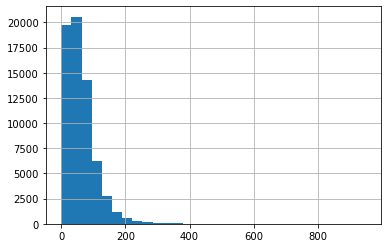

In [169]:
df_id['spending_shop_mean'].hist(bins=30)

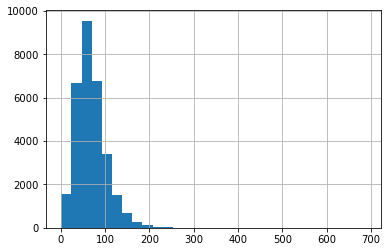

In [170]:
# What about without one-time purchasers?

df_id_multiple = remove_one_time_purchasers(df_id)
df_id_multiple['spending_shop_mean'].hist(bins=30)

per month

In [171]:
# We use the average_shopping_month extracted from the survey to get the spending for each month
# From this data, we can then extract the 'family type'

df_id['spending_month'] = df_id['spending_shop_mean'] * average_shopping_month

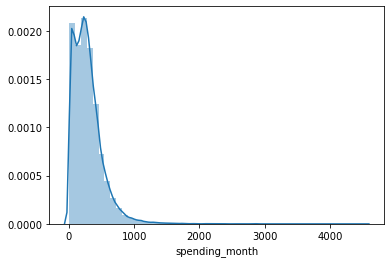

In [172]:
sns.distplot(df_id['spending_month'])

In [173]:
# We can use our Logistic Regressor classifier to predict the "family type" based on the monthly spending.

df_id['family_type'] = clf.predict(df_id['spending_month'].to_numpy().reshape(-1,1))

In [174]:
df_id['family_type'].value_counts()

single    40066
family    13421
couple    12570
Name: family_type, dtype: int64

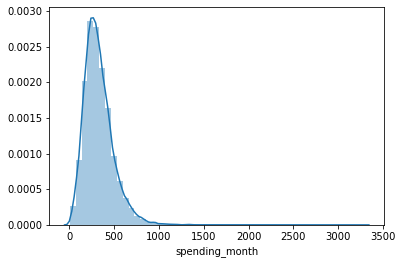

In [175]:
# What about without one-time purchasers?

df_id_multiple = remove_one_time_purchasers(df_id)
sns.distplot(df_id_multiple['spending_month'])

In [176]:
df_id_multiple['family_type'].value_counts()

single    15075
couple     8631
family     6925
Name: family_type, dtype: int64

In [177]:
# Better to encode the categorical variable

df_id = df_id.join(pd.get_dummies(df_id['family_type']))
df_id.drop(['family_type'], axis=1, inplace=True)

In [178]:
df_id.head()

,count,hour_mean,hour_var,unit_tot,animal_tot,bebe_tot,animal_perc,bebe_perc,animal,bebe,premium,cheap,high_carr_perc2,low_carr_perc2,n_unit_shop_mean,n_unit_shop_var,spending_shop_mean,spending_shop_var,spending_month,couple,family,single
customer,,,,,,,,,,,,,,,,,,,,,,
77000001548,12.0,21.086667,2.240761,222,2.0,0.0,0.900901,0.000000,1,0,0,1,0.250000,0.750000,18.500000,628.636364,45.008333,2058.857652,214.833769,0,0,1
77000001680,15.0,16.844156,2.281822,403,1.0,4.0,0.248139,0.992556,1,1,0,1,0.000000,1.000000,26.866667,704.123810,74.526000,6517.127069,355.727490,1,0,0
77000002166,16.0,19.004329,2.752155,324,3.0,2.0,0.925926,0.617284,1,1,0,1,0.000000,1.000000,20.250000,911.000000,61.297500,9967.298087,292.585216,0,0,1
77000004744,7.0,11.636364,1.707013,259,1.0,2.0,0.386100,0.772201,1,1,0,0,0.136327,0.863673,37.000000,1064.000000,78.420000,5588.240100,374.314330,1,0,0
77000005496,1.0,23.000000,0.000000,5,0.0,0.0,0.000000,0.000000,0,0,0,0,0.136327,0.863673,5.000000,NaN,12.990000,NaN,62.003866,0,0,1


total

In [179]:
df_id['spending_tot'] = sum_by_shopping.groupby(by=['customer']).sum()['net_am']

In [180]:
df_id.head()

,count,hour_mean,hour_var,unit_tot,animal_tot,bebe_tot,animal_perc,bebe_perc,animal,bebe,premium,cheap,high_carr_perc2,low_carr_perc2,n_unit_shop_mean,n_unit_shop_var,spending_shop_mean,spending_shop_var,spending_month,couple,family,single,spending_tot
customer,,,,,,,,,,,,,,,,,,,,,,,
77000001548,12.0,21.086667,2.240761,222,2.0,0.0,0.900901,0.000000,1,0,0,1,0.250000,0.750000,18.500000,628.636364,45.008333,2058.857652,214.833769,0,0,1,540.10
77000001680,15.0,16.844156,2.281822,403,1.0,4.0,0.248139,0.992556,1,1,0,1,0.000000,1.000000,26.866667,704.123810,74.526000,6517.127069,355.727490,1,0,0,1117.89
77000002166,16.0,19.004329,2.752155,324,3.0,2.0,0.925926,0.617284,1,1,0,1,0.000000,1.000000,20.250000,911.000000,61.297500,9967.298087,292.585216,0,0,1,980.76
77000004744,7.0,11.636364,1.707013,259,1.0,2.0,0.386100,0.772201,1,1,0,0,0.136327,0.863673,37.000000,1064.000000,78.420000,5588.240100,374.314330,1,0,0,548.94
77000005496,1.0,23.000000,0.000000,5,0.0,0.0,0.000000,0.000000,0,0,0,0,0.136327,0.863673,5.000000,NaN,12.990000,NaN,62.003866,0,0,1,12.99


### 'sex' of product distribution

In [181]:
pt = df[['customer', '_id','sex']].copy()
pt.head()

,customer,_id,sex
0,77021708271,1001,N
1,77021708271,1002,N
2,77021708271,1002,N
3,77021708271,1003,N
4,77021708271,1003,N


In [182]:
pt_single_index = pd.pivot_table(pt, index='customer', columns='sex', aggfunc=len, fill_value=0)

In [183]:
pt_single_index.reset_index(inplace=True)  

In [184]:
pt_single_index.columns

MultiIndex([('customer',  ''),
            (     '_id', 'F'),
            (     '_id', 'M'),
            (     '_id', 'N')],
           names=[None, 'sex'])

In [185]:
pt_single_index[pt_single_index['_id']['F']!=0]

customer _id        
sex                  F  M    N
1      77000001680   2  0  306
2      77000002166   3  0  228
10     77000018175   2  0   60
12     77000019784   6  0  243
13     77000021548   3  0  267
...            ...  .. ..  ...
66030  77099969680   1  0   37
66031  77099970476   2  0  179
66041  77099982347   1  0  346
66050  77099989647   2  2  167
66053  77099995489   2  0  129

[21607 rows x 4 columns]

Now let's make a dataframe out of the pivot table for easy manipulation

In [186]:
df_sex = pd.DataFrame([pt_single_index.customer, pt_single_index._id.N, pt_single_index._id.M, pt_single_index._id.F]).T

In [187]:
df_sex.head()

,customer,N,M,F
0,77000001548,150,0,0
1,77000001680,306,0,2
2,77000002166,228,0,3
3,77000004744,176,0,0
4,77000005496,5,0,0


Let's merge all together with df_id

In [188]:
df_id.shape

(66057, 23)

In [189]:
df_sex.shape

(66057, 4)

In [190]:
df_id = df_id.merge(df_sex, on='customer')

In [191]:
# We can drop 'N' because we do not need it

df_id.drop(['N'], axis=1, inplace=True)

In [192]:
df_id.shape

(66057, 26)

In [193]:
df_id.head()

,customer,count,hour_mean,hour_var,unit_tot,animal_tot,bebe_tot,animal_perc,bebe_perc,animal,bebe,premium,cheap,high_carr_perc2,low_carr_perc2,n_unit_shop_mean,n_unit_shop_var,spending_shop_mean,spending_shop_var,spending_month,couple,family,single,spending_tot,M,F
0,77000001548,12.0,21.086667,2.240761,222,2.0,0.0,0.900901,0.000000,1,0,0,1,0.250000,0.750000,18.500000,628.636364,45.008333,2058.857652,214.833769,0,0,1,540.10,0,0
1,77000001680,15.0,16.844156,2.281822,403,1.0,4.0,0.248139,0.992556,1,1,0,1,0.000000,1.000000,26.866667,704.123810,74.526000,6517.127069,355.727490,1,0,0,1117.89,0,2
2,77000002166,16.0,19.004329,2.752155,324,3.0,2.0,0.925926,0.617284,1,1,0,1,0.000000,1.000000,20.250000,911.000000,61.297500,9967.298087,292.585216,0,0,1,980.76,0,3
3,77000004744,7.0,11.636364,1.707013,259,1.0,2.0,0.386100,0.772201,1,1,0,0,0.136327,0.863673,37.000000,1064.000000,78.420000,5588.240100,374.314330,1,0,0,548.94,0,0
4,77000005496,1.0,23.000000,0.000000,5,0.0,0.0,0.000000,0.000000,0,0,0,0,0.136327,0.863673,5.000000,NaN,12.990000,NaN,62.003866,0,0,1,12.99,0,0


In [194]:
df_id[df_id['F']!=0].shape

(21607, 26)

In [195]:
df_id[df_id['M']!=0].shape

(7579, 26)

In [196]:
# There are some null values in the dataset created so far.

df_id.isnull().apply(lambda x: sum(x), axis=0)

customer                  0
count                     0
hour_mean                 0
hour_var               3294
unit_tot                  0
animal_tot                0
bebe_tot                  0
animal_perc             124
bebe_perc               124
animal                    0
bebe                      0
premium                   0
cheap                     0
high_carr_perc2           0
low_carr_perc2            0
n_unit_shop_mean          0
n_unit_shop_var       35426
spending_shop_mean        0
spending_shop_var     35426
spending_month            0
couple                    0
family                    0
single                    0
spending_tot              0
M                         0
F                         0
dtype: int64

In [197]:
# For the animal and babe perc features, thete are some products in the original dataset which have total shopping units equal 0
# This explains the division by 0 that results in NaN

df_id[df_id['animal_perc'].isnull()]

,customer,count,hour_mean,hour_var,unit_tot,animal_tot,bebe_tot,animal_perc,bebe_perc,animal,bebe,premium,cheap,high_carr_perc2,low_carr_perc2,n_unit_shop_mean,n_unit_shop_var,spending_shop_mean,spending_shop_var,spending_month,couple,family,single,spending_tot,M,F
1390,77001999276,1.0,10.0,NaN,0,0.0,0.0,NaN,NaN,0,0,0,0,0.136327,0.863673,0.0,NaN,0.0,NaN,0.0,0,0,1,0.0,0,0
1880,77002753608,1.0,19.0,NaN,0,0.0,0.0,NaN,NaN,0,0,0,0,0.136327,0.863673,0.0,NaN,0.0,NaN,0.0,0,0,1,0.0,0,0
1889,77002762730,1.0,14.0,NaN,0,0.0,0.0,NaN,NaN,0,0,0,0,0.136327,0.863673,0.0,NaN,0.0,NaN,0.0,0,0,1,0.0,0,0
2656,77003884134,1.0,9.0,NaN,0,0.0,0.0,NaN,NaN,0,0,0,0,0.136327,0.863673,0.0,NaN,0.0,NaN,0.0,0,0,1,0.0,0,0
2961,77004351998,1.0,12.0,NaN,0,0.0,0.0,NaN,NaN,0,0,0,0,0.136327,0.863673,0.0,NaN,0.0,NaN,0.0,0,0,1,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65009,77098378200,1.0,13.0,NaN,0,0.0,0.0,NaN,NaN,0,0,0,0,0.136327,0.863673,0.0,NaN,0.0,NaN,0.0,0,0,1,0.0,0,0
65539,77099172206,1.0,12.0,NaN,0,0.0,0.0,NaN,NaN,0,0,0,0,0.136327,0.863673,0.0,NaN,0.0,NaN,0.0,0,0,1,0.0,0,0
65600,77099284730,1.0,20.0,NaN,0,0.0,0.0,NaN,NaN,0,0,0,0,0.136327,0.863673,0.0,NaN,0.0,NaN,0.0,0,0,1,0.0,0,0
65675,77099385026,1.0,11.0,NaN,0,0.0,0.0,NaN,NaN,0,0,0,0,0.136327,0.863673,0.0,NaN,0.0,NaN,0.0,0,0,1,0.0,0,0


In [198]:
df_id.fillna(0, inplace=True)

# Clustering

In [199]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import LatentDirichletAllocation

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [200]:
# Step 1: remove customer ID

df_clustering = df_id.drop(['customer'], axis=1)

In [201]:
df_id.columns

Index(['customer', 'count', 'hour_mean', 'hour_var', 'unit_tot', 'animal_tot',
       'bebe_tot', 'animal_perc', 'bebe_perc', 'animal', 'bebe', 'premium',
       'cheap', 'high_carr_perc2', 'low_carr_perc2', 'n_unit_shop_mean',
       'n_unit_shop_var', 'spending_shop_mean', 'spending_shop_var',
       'spending_month', 'couple', 'family', 'single', 'spending_tot', 'M',
       'F'],
      dtype='object')

In [202]:
# Step 2: remove one-time shoppers

df_clustering = remove_one_time_purchasers(df_clustering)

In [203]:
# Step 3: after different experiment, we decided to keep these columns for the clustering

clustering_cols = ['animal_perc', 'high_carr_perc2', 'low_carr_perc2', 'couple', 'family', 'single']
df_clustering = df_clustering[clustering_cols]

In [204]:
df_clustering.shape

(30631, 6)

In [207]:
from sklearn.preprocessing import StandardScaler

# Why StandardScaler?
# Because K-means uses distances between data points, 
# by scaling all the features we give to them the same level of importance

scaler = StandardScaler()
scaler.fit(df_clustering)
df_clustering_scaled = scaler.transform(df_clustering)

In [208]:
df_clustering_scaled

array([[ 0.42302726,  0.50222752, -0.50222752, -0.62635308, -0.5404814 ,
         1.0158283 ],
       [-0.28926609, -0.61140581,  0.61140581,  1.5965436 , -0.5404814 ,
        -0.98441833],
       [ 0.45033455, -0.61140581,  0.61140581, -0.62635308, -0.5404814 ,
         1.0158283 ],
       ...,
       [-0.56003513, -0.00413225,  0.00413225, -0.62635308, -0.5404814 ,
         1.0158283 ],
       [-0.00612688, -0.61140581,  0.61140581,  1.5965436 , -0.5404814 ,
        -0.98441833],
       [-0.0157961 ,  0.87343863, -0.87343863,  1.5965436 , -0.5404814 ,
        -0.98441833]])

In [209]:
# TODO: remove uneccessary columns before clustering 
# What affects clustering?
# How to improve clustering results?
# Hierachical clustering???

sum_of_squared_distances = []

for k in tqdm(range(1,30)):
    km = KMeans(n_clusters=k)
    
    km.fit(df_clustering_scaled)
    sum_of_squared_distances.append(km.inertia_)

100%|██████████| 29/29 [00:20<00:00,  1.45it/s]


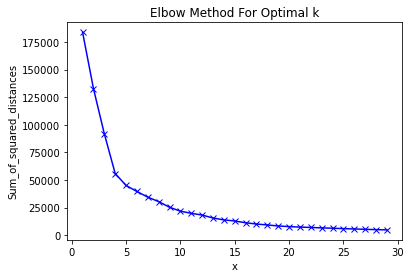

In [210]:
x = range(1, len(sum_of_squared_distances)+1)
plt.plot(x, sum_of_squared_distances, 'bx-')
plt.xlabel('x')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [237]:
sum_of_squared_distances

[183785.99999999948,
 132811.1210712488,
 91863.22354491797,
 55884.073365186516,
 45067.79995996613,
 39610.41642976644,
 34475.57813731641,
 30453.60292664538,
 25327.018696388994,
 21770.945530675715,
 19853.754916139962,
 18273.679073822732,
 15605.073061484667,
 13881.055717883897,
 12914.985867093948,
 11285.23862384021,
 10136.050578095157,
 9325.365445987372,
 8379.360951365872,
 7827.84131190049,
 7379.897792744193,
 7061.1035731315615,
 6646.8001826308655,
 6384.095691646059,
 5982.021251174774,
 5690.545684796229,
 5372.707569788033,
 5089.556646057532,
 4822.238849650725]

In [211]:
n_clusters = 4
km = KMeans(n_clusters=n_clusters)
km.fit(df_clustering_scaled)

KMeans(n_clusters=4)

In [212]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

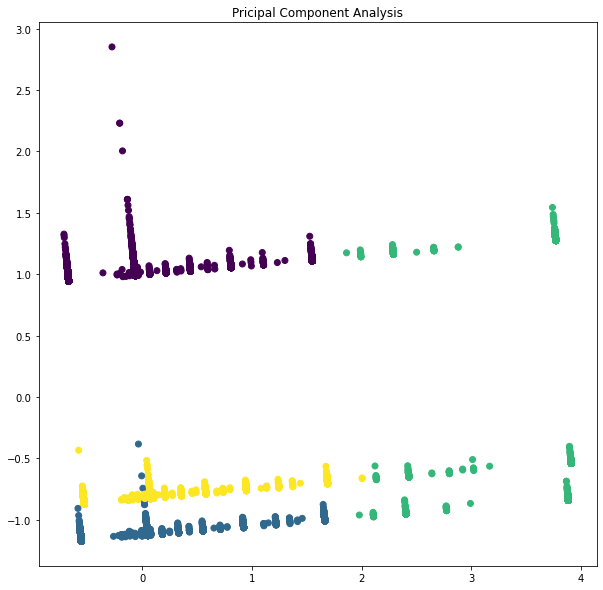

In [213]:
# TODO: make proper pipeline here

SS1 = StandardScaler()
SS2 = StandardScaler()
pca = PCA(n_components=2)

pca = make_pipeline(SS1, pca, SS2)

X = df_clustering.copy()


pca.fit(X)
X_pca = pca.transform(X)

fig, ax = plt.subplots(1,1,figsize=(10,10))


x_vals_pca = X_pca[:,0]
y_vals_pca = X_pca[:,1]

ax.set_title('Pricipal Component Analysis')
ax.scatter(x_vals_pca, y_vals_pca, c=km.labels_)
plt.show()

In [214]:
df_clustering_scaled = pd.DataFrame(df_clustering_scaled, columns=df_clustering.columns)

In [215]:
df_clustering_scaled['cluster'] = km.labels_

In [216]:
df_clustering_scaled.head()

,animal_perc,high_carr_perc2,low_carr_perc2,couple,family,single,cluster
0,0.423027,0.502228,-0.502228,-0.626353,-0.540481,1.015828,0
1,-0.289266,-0.611406,0.611406,1.596544,-0.540481,-0.984418,1
2,0.450335,-0.611406,0.611406,-0.626353,-0.540481,1.015828,0
3,-0.138723,-0.004132,0.004132,1.596544,-0.540481,-0.984418,1
4,1.021413,-0.004132,0.004132,1.596544,-0.540481,-0.984418,1


In [219]:
df_personas = df_clustering_scaled.groupby(by=['cluster']).mean()

In [220]:
df_personas.columns

Index(['animal_perc', 'high_carr_perc2', 'low_carr_perc2', 'couple', 'family',
       'single'],
      dtype='object')

In [221]:
df_personas

,animal_perc,high_carr_perc2,low_carr_perc2,couple,family,single
cluster,,,,,,
0,0.025834,-0.193378,0.193378,-0.626353,-0.540481,1.015828
1,-0.022377,-0.191949,0.191949,1.596544,-0.540481,-0.984418
2,-0.017794,3.554431,-3.554431,0.039063,0.037658,-0.066658
3,-0.024592,-0.166294,0.166294,-0.626353,1.850202,-0.984418


# Cluster-Insurance matching

In [222]:
df_personas.columns = ['pets', 'high_income', 'low_income', 'couple', 'family', 'single']

In [223]:
df_personas

,pets,high_income,low_income,couple,family,single
cluster,,,,,,
0,0.025834,-0.193378,0.193378,-0.626353,-0.540481,1.015828
1,-0.022377,-0.191949,0.191949,1.596544,-0.540481,-0.984418
2,-0.017794,3.554431,-3.554431,0.039063,0.037658,-0.066658
3,-0.024592,-0.166294,0.166294,-0.626353,1.850202,-0.984418


In [236]:
df_personas.to_csv('clustering.csv')

In [224]:
total_insurance = [
    'home', 
    'rent', 
    'damage', 
    'life', 
    'injury', 
    'self_sufficiency', 
    'liability', 
    'pets', 
    'transport',
    'travel',
    'loan',
    'accumulation_plan',
    'pension_fund',
    'investment']

In [225]:
# This is the result from the label testing resulting from the survey

label_matching = {
    'single': ['transport', 'pension_fund', 'investment'],
    'couple': ['life', 'transport', 'travel', 'loan', 'accumulation_plan', 'pension_fund'],
    'family': ['home', 'life', 'transport', 'accumulation_plan', 'pension_fund'],
    'high_income': ['investment'],
    'low_income': ['life', 'injury', 'transport', 'travel', 'accumulation_plan', 'pension_fund', 'investment'],
    'pets': ['home', 'liability', 'pets']
}

In [226]:
computation_matrix = pd.DataFrame(index=total_insurance)
df_cluster_matching = pd.DataFrame(index=total_insurance)

In [235]:
for cluster in df_personas.index:
    
    for key in label_matching.keys():
        computation_matrix.loc[label_matching[key],key] = df_personas.loc[cluster, key]
    
    if cluster == 0:
        print(computation_matrix)
        computation_matrix.to_csv('computational_matrix.csv')
        
    computation_matrix.fillna(0, inplace=True)
    df_cluster_matching[str(cluster)] = computation_matrix.apply(lambda x: sum(x), axis=1)

                     single    couple    family  high_income  low_income  \
home               0.000000  0.000000 -0.540481     0.000000    0.000000   
rent               0.000000  0.000000  0.000000     0.000000    0.000000   
damage             0.000000  0.000000  0.000000     0.000000    0.000000   
life               0.000000 -0.626353 -0.540481     0.000000    0.193378   
injury             0.000000  0.000000  0.000000     0.000000    0.193378   
self_sufficiency   0.000000  0.000000  0.000000     0.000000    0.000000   
liability          0.000000  0.000000  0.000000     0.000000    0.000000   
pets               0.000000  0.000000  0.000000     0.000000    0.000000   
transport          1.015828 -0.626353 -0.540481     0.000000    0.193378   
travel             0.000000 -0.626353  0.000000     0.000000    0.193378   
loan               0.000000 -0.626353  0.000000     0.000000    0.000000   
accumulation_plan  0.000000 -0.626353 -0.540481     0.000000    0.193378   
pension_fund

In [233]:
df_cluster_matching

,0,1,2,3
home,-0.514647,-0.562858,0.019864,1.825610
rent,0.000000,0.000000,0.000000,0.000000
damage,0.000000,0.000000,0.000000,0.000000
life,-0.973456,1.248012,-3.477710,1.390143
injury,0.193378,0.191949,-3.554431,0.166294
self_sufficiency,0.000000,0.000000,0.000000,0.000000
liability,0.025834,-0.022377,-0.017794,-0.024592
pets,0.025834,-0.022377,-0.017794,-0.024592
transport,0.042372,0.263593,-3.544368,0.405725
travel,-0.432975,1.788493,-3.515368,-0.460060


In [232]:
df_cluster_matching.to_csv('cluster_matching.csv')